In [126]:
%matplotlib inline
import pandas
import math
import matplotlib.pyplot as plt

data = pandas.read_csv('data1.tsv', sep="\t")
route_to_stops_count = pandas.read_csv('route1.tsv', sep="\t")
debug = pandas.read_csv('debug1.tsv', sep="\t")

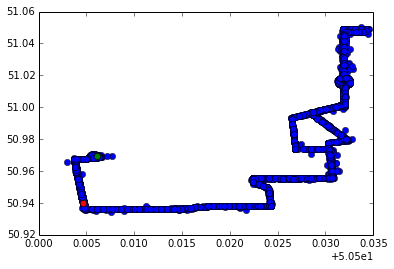

In [148]:
X = data["latitude"].copy()
Y = data["longitude"].copy()
plt.plot(X, Y, 'o')
plt.plot(X[0], Y[0], 'o')
plt.plot(X[1], Y[1], 'o') 
#plt.plot(X[6273], Y[6273], 'o')

Ищется самая минимально удалёная точка для последней найденной. 
Стартовой служит первая точка из массива данных.

In [149]:
#X = debug["latitude"].copy()
#Y = debug["longitude"].copy()
new_x = [(X.pop(0))]
new_y = [(Y.pop(0))]

x =[]
for i in X:
    x.append(i)
X = x
y =[]
for i in Y:
    y.append(i)
Y = y

while len(X) != 0:
    next_eps = 100
    min_eps = 100
    for i in range(len(X)):#поиск минимально удалёной точки в массиве
        min_eps = math.sqrt(math.pow(X[i] - new_x[len(new_x)-1], 2) + math.pow(Y[i] - new_y[len(new_y)-1], 2))
        if (min_eps < next_eps):
            next_eps = min_eps
            idx = i
    new_x.append(X.pop(idx))
    new_y.append(Y.pop(idx))
    x =[]
    for i in X:
        x.append(i)
    X = x
    y =[]
    for i in Y:
        y.append(i)
    Y = y
X = new_x
Y = new_y

0.0037730934258259482
0.09476284396322934


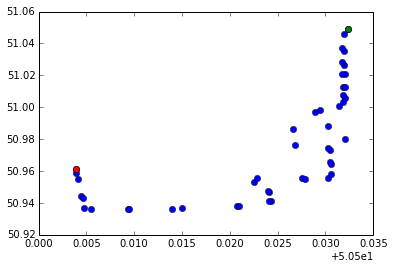

In [131]:
plt.plot(new_x, new_y, 'o')
i = 46
j = 0
plt.plot(new_x[i], new_y[i], 'o')
plt.plot(new_x[j], new_y[j], 'o') 
print(math.sqrt(math.pow(new_x[2] - new_x[1], 2) + math.pow(new_y[2] - new_y[1], 2)))
print(math.sqrt(math.pow(new_x[46] - new_x[1], 2) + math.pow(new_y[46] - new_y[1], 2)))

In [150]:
max_eps = 0
min_eps = 1000
eps = 0
max_idx = 0
min_idx = 0
for i in range(len(X) - 1):
    eps = math.sqrt(math.pow(X[i+1] - X[i], 2) + math.pow(Y[i+1] - Y[i], 2))
    if (eps > max_eps):
        max_idx = i
        max_eps = eps
    elif (eps < min_eps):
        min_idx = i
        min_eps = eps
print(max_idx, min_idx)

6084 6


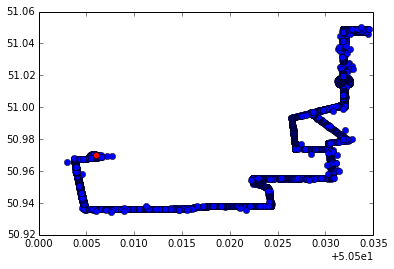

In [151]:
plt.plot(new_x, new_y, 'o')
i = 30
j = 31
plt.plot(new_x[i], new_y[i], 'o')
plt.plot(new_x[j], new_y[j], 'o') 

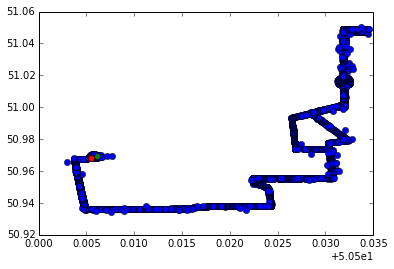

In [152]:
plt.plot(X, Y, 'o')
i = 0
j = len(X)-1
plt.plot(X[i], Y[i], 'o')
plt.plot(X[j], Y[j], 'o') 

Для всех маршрутов необходимо рекурсивно вызывать так как транспорт не один круг будет двигаться по маршруту.

In [159]:
route_x = []
route_y = []
back_route_x = []
back_route_y = []
X = debug["latitude"].copy()
Y = debug["longitude"].copy()
idx_item = 0
for j in range(len(new_x)):
    if (new_x[j] == X[0]) and (new_y[j] == Y[0]):
        idx_item = j
x = []
y = []
for j in range(len(new_x)-idx_item-1):
    x.append(new_x[j+idx_item+1])
    y.append(new_y[j+idx_item+1])
new_x = x
new_y = y
route_x.append(X[0])
route_y.append(Y[0])

for i in range(len(X)):
    if (len(new_x) != 0):
        idx_item = 0
        for j in range(len(new_x)):
            if (new_x[j] == X[i]) and (new_y[j] == Y[i]):
                idx_item = j
        x = []
        y = []
        for j in range(len(new_x)-idx_item-1):
            x.append(new_x[j+idx_item+1])
            y.append(new_y[j+idx_item+1])
        new_x = x
        new_y = y
        route_x.append(X[i])
        route_y.append(Y[i])
    else:
        break
        back_route_x.append(X[i])
        back_route_y.append(Y[i])
print (len(route_x))

48


Построение графика маршрута в одну сторону и в другую:

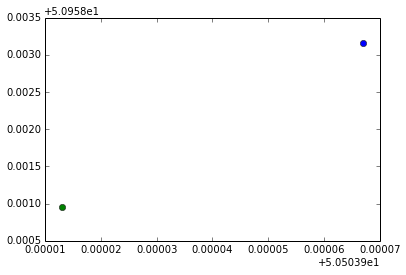

In [157]:
#plt.plot(back_route_x, back_route_y)
plt.plot(route_x[0], route_y[0], 'o')
plt.plot(route_x[len(route_x)-1], route_y[len(route_x)-1], 'o')

In [139]:
f_eps = 0
for i in range(len(route_x) - 1):
    f_eps = max(math.sqrt(math.pow(route_x[i+1] - route_x[i], 2) + math.pow(route_y[i+1] - route_y[i], 2)), f_eps)
s_eps = 0
for i in range(len(back_route_x) - 1):
    s_eps = max(math.sqrt(math.pow(back_route_x[i+1] - back_route_x[i], 2) + 
                        math.pow(back_route_y[i+1] - back_route_y[i], 2)), s_eps)
eps = min(f_eps, s_eps)
new_route_x = [route_x[0]]
new_route_y = [route_y[0]]
for i in range(len(route_x)-1):
    dist = math.sqrt(math.pow(route_x[i+1] - new_route_x[len(new_route_x)-1], 2) +
                     math.pow(route_y[i+1] - new_route_y[len(new_route_y)-1], 2))
    if dist >= eps:
        new_route_x.append(route_x[i+1])
        new_route_y.append(route_y[i+1])

In [140]:
new_back_route_x = [back_route_x[0]]
new_back_route_y = [back_route_y[0]]
for i in range(len(back_route_x)-1):
    dist = math.sqrt(math.pow(back_route_x[i+1] - new_back_route_x[len(new_back_route_x)-1], 2) +
                     math.pow(back_route_y[i+1] - new_back_route_y[len(new_back_route_y)-1], 2))
    if dist >= eps:
        new_back_route_x.append(back_route_x[i+1])
        new_back_route_y.append(back_route_y[i+1])

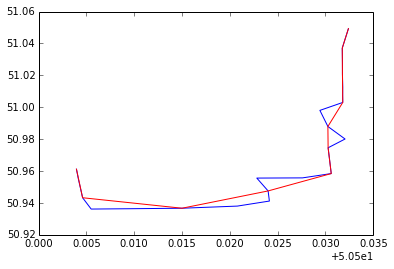

In [144]:
plt.plot(route_x, route_y)
plt.plot(new_route_x, new_route_y, c = 'r')

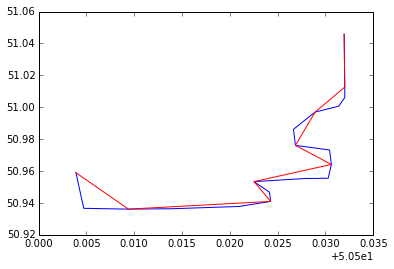

In [145]:
plt.plot(back_route_x, back_route_y)
plt.plot(new_back_route_x, new_back_route_y, c = 'r')

In [181]:
X = data["latitude"].copy()
Y = data["longitude"].copy()
eps = 0
for i in range(len(X) - 1):
    eps = max(math.sqrt(math.pow(X[i+1] - X[i], 2) + math.pow(Y[i+1] - Y[i], 2)), eps)
print(eps)

0.08951050189223334


In [178]:
import sort_coordinates
array_coordinates = sort_coordinates.sort_coordinates(X, Y)
print (len(array_coordinates))

2


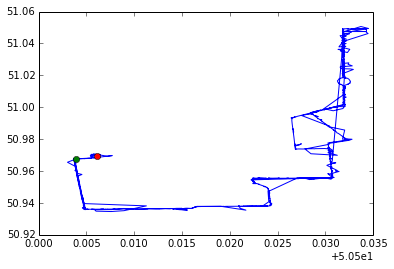

In [185]:
new_x = array_coordinates[0]
new_y = array_coordinates[1]
plt.plot(new_x, new_y)
plt.plot(X[len(X)-1], Y[len(X)-1], 'o')
plt.plot(X[0], Y[0], 'o')